In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
sys.path.append('../..')

In [3]:
import pyrankability

In [29]:
import ranklib

In [5]:
import os
ranklib_path = os.path.dirname(ranklib.__file__)

In [46]:
instance = ranklib.common.load_instance(ranklib_path+"/problem_instances/instances/D_strong_dom_25_flip_20.json")

In [55]:
mdg,dg = pyrankability.analysis.get_graph(instance['P'])

In [78]:
# what's the longest string that exists in all of the P set?
longest = {}
for starting_item, nbrs in mdg.adjacency():
    if starting_item in longest and longest[starting_item] == None: # already in a path
        continue
    current_item = starting_item
    current_nbrs = list(mdg.neighbors(current_item))
    longest[starting_item] = [starting_item]
    while (len(current_nbrs) == 1):
        current_item = current_nbrs[0]
        longest[current_item] = None
        longest[starting_item].append(current_item)
        current_nbrs = list(mdg.neighbors(current_item))
    print(longest[starting_item])

longest_starting_items = list(longest.keys())
mapping = {}
for i,start_item in enumerate(longest_starting_items):
    if longest[start_item] == None:
        continue
    mapping[i] = ",".join([str(v) for v in longest[start_item]])
longest_dg = nx.DiGraph()
        
#now add in the perm_i
for j in range(len(instance["P"])):
    perm_j = instance["P"][j,:]
    for i in range(len(perm_j)-1):
        i_t = perm_j[i]
        j_t = perm_j[i+1]
        i_t_longest = None
        j_t_longest = None
        for start_item in longest_starting_items:
            if longest[start_item] == None:
                continue
            if i_t in longest[start_item]:
                i_t_longest = start_item
            if j_t in longest[start_item]:
                j_t_longest = start_item
        if i_t_longest != j_t_longest:
            longest_dg.add_weighted_edges_from([(i_t_longest,j_t_longest, 1.0)])

longest_dg_with_names=nx.relabel_nodes(longest_dg,mapping)

levels = []
for level_ix in range(instance["P"].shape[1]):
    level = {}
    for perm_ix in range(instance["P"].shape[0]):
        item = instance["P"][perm_ix,level_ix]
        if item not in level: # First time
            level[item] = []
        level[item].append(item)
    levels.append(level)
print(levels)



[0, 1, 2, 3, 4]
[5]
[6]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[17]
[18]
[19, 20, 21, 22, 23, 24]
[{0: [0, 0, 0, 0]}, {1: [1, 1, 1, 1]}, {2: [2, 2, 2, 2]}, {3: [3, 3, 3, 3]}, {4: [4, 4, 4, 4]}, {5: [5, 5], 6: [6, 6]}, {6: [6, 6], 5: [5, 5]}, {7: [7, 7, 7, 7]}, {8: [8, 8, 8, 8]}, {9: [9, 9, 9, 9]}, {10: [10, 10, 10, 10]}, {11: [11, 11, 11, 11]}, {12: [12, 12, 12, 12]}, {13: [13, 13, 13, 13]}, {14: [14, 14, 14, 14]}, {15: [15, 15, 15, 15]}, {16: [16, 16, 16, 16]}, {17: [17, 17], 18: [18, 18]}, {18: [18, 18], 17: [17, 17]}, {19: [19, 19, 19, 19]}, {20: [20, 20, 20, 20]}, {21: [21, 21, 21, 21]}, {22: [22, 22, 22, 22]}, {23: [23, 23, 23, 23]}, {24: [24, 24, 24, 24]}]


In [68]:
print(list(current_nbrs))

[1]


In [49]:
for n, nbrs in mdg.adjacency():
    print(n)
    for nbr, edict in nbrs.items():
        print(nbr,edict)

0
1 {0: {'index': 0, 'weight': 1.0}, 1: {'index': 1, 'weight': 1.0}, 2: {'index': 2, 'weight': 1.0}, 3: {'index': 3, 'weight': 1.0}}
1
2 {0: {'index': 0, 'weight': 1.0}, 1: {'index': 1, 'weight': 1.0}, 2: {'index': 2, 'weight': 1.0}, 3: {'index': 3, 'weight': 1.0}}
2
3 {0: {'index': 0, 'weight': 1.0}, 1: {'index': 1, 'weight': 1.0}, 2: {'index': 2, 'weight': 1.0}, 3: {'index': 3, 'weight': 1.0}}
3
4 {0: {'index': 0, 'weight': 1.0}, 1: {'index': 1, 'weight': 1.0}, 2: {'index': 2, 'weight': 1.0}, 3: {'index': 3, 'weight': 1.0}}
4
5 {0: {'index': 0, 'weight': 1.0}, 1: {'index': 1, 'weight': 1.0}}
6 {0: {'index': 2, 'weight': 1.0}, 1: {'index': 3, 'weight': 1.0}}
5
6 {0: {'index': 0, 'weight': 1.0}, 1: {'index': 1, 'weight': 1.0}}
7 {0: {'index': 2, 'weight': 1.0}, 1: {'index': 3, 'weight': 1.0}}
6
7 {0: {'index': 0, 'weight': 1.0}, 1: {'index': 1, 'weight': 1.0}}
5 {0: {'index': 2, 'weight': 1.0}, 1: {'index': 3, 'weight': 1.0}}
7
8 {0: {'index': 0, 'weight': 1.0}, 1: {'index': 1, 'weight

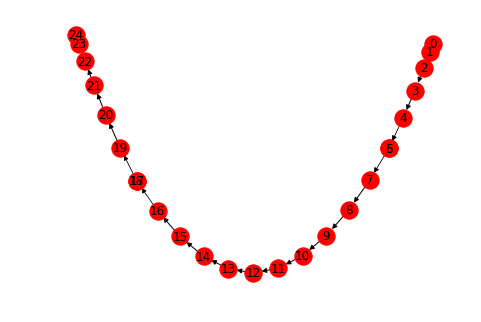

In [52]:
import networkx as nx

edges = dg.edges()
weights = [dg[u][v]['weight'] for u,v in edges]

#pos = nx.spectral_layout(dg)
nx.draw(dg, width=weights,with_labels=True)

#nx.draw(dg, with_labels=True, font_weight='bold')

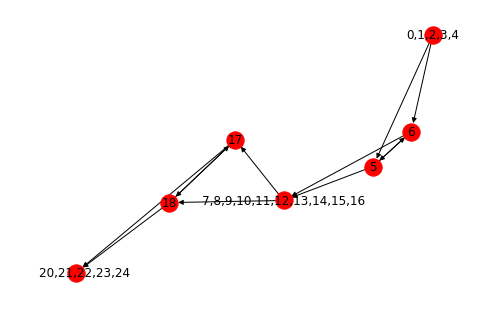

In [79]:
nx.draw(longest_dg_with_names, with_labels=True)


In [20]:
import tempfile
f = tempfile.NamedTemporaryFile(delete=False,suffix=".png")
#layout = g.layout_reingold_tilford_circular(root=[0])
#visual_style = {}
#visual_style["vertex_size"] = 20
#>>> visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
#visual_style["vertex_label"] = g.vs["name"]
#>>> visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
#visual_style["layout"] = layout
res = ig.plot(g,target=f.name)

/usr/local/lib/python3.6/dist-packages/igraph/drawing/__init__.py:263: UserWarning: <module 'igraph' from '/usr/local/lib/python3.6/dist-packages/igraph/__init__.py'> does not support plotting
  warn("%s does not support plotting" % obj)


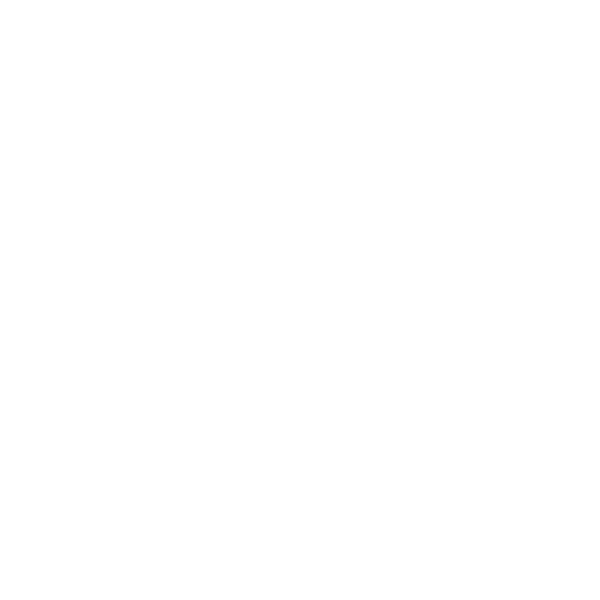

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= f.name)

In [18]:
"file:/"+f.name

'file://tmp/tmpag4vq3ng.png'

In [5]:
import os

path = '/dev/shm/test'
notP = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for filename in filenames:
        contents = open(path+"/"+filename).read().strip()
        if len(contents) > 0:
            notP.append([int(v) for v in contents.split(",")])

In [9]:
import numpy as np
notP_array = np.array(notP)

In [35]:
notP_array[np.where(notP_array[:,4] != -1)[0],:5]

array([], shape=(0, 5), dtype=int64)

In [31]:
notP_array[:,3] != -1

array([ True,  True,  True, ...,  True,  True,  True])